In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv(r'Dataset/MohsHardnessDataset/train.csv', encoding='utf-8')
test_df = pd.read_csv(r'Dataset/MohsHardnessDataset/test.csv', encoding='utf-8')
submission_df = pd.read_csv(r'Dataset/MohsHardnessDataset/sample_submission.csv', encoding='utf-8')
original_df = pd.read_csv(r'Dataset/MohsHardnessDataset/Mineral_Dataset_Supplementary_Info.csv', encoding='utf-8')
train_df.shape, test_df.shape, submission_df.shape, original_df.shape

((10407, 13), (6939, 12), (6939, 2), (622, 13))

In [6]:
train = train_df.copy()
test = test_df.copy()
original = original_df.copy()

In [7]:
train.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [9]:
original.head()

,Unnamed: 0,Hardness,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,0,2.3,110.0,23.000000,36.666667,2.666667,82.598467,8.504133,2.146667,2.006667,1.253333,0.456803,7.666667
1,1,5.5,406.0,30.472136,9.902439,4.682927,19.813180,11.456151,2.700244,1.676829,0.868293,0.522909,0.743223
2,2,5.5,406.0,30.472464,10.410256,4.923077,20.931371,11.541405,2.753590,1.703846,0.894359,0.497498,0.781345
3,3,5.5,476.0,61.142136,11.609756,4.682927,23.659644,11.487395,2.763659,1.714634,0.848780,0.519474,1.491272
4,4,5.5,476.0,61.142464,12.205128,4.923077,24.975089,11.574251,2.820256,1.743590,0.873846,0.493887,1.567755


In [10]:
train.drop(['id'], axis=1, inplace=True)
original.drop(['Unnamed: 0'], axis=1, inplace=True)
train = pd.concat([train, original], ignore_index=True)
train.shape

(11029, 12)

In [11]:
test.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,10407,884.0,121.420000,35.36,5.28,82.561240,9.370384,2.298,1.9072,1.200000,0.461899,1.79459
1,10408,90.0,9.931960,18.00,5.60,39.568056,12.086300,2.868,1.6520,0.864000,0.476196,1.41194
2,10409,116.0,7.767992,11.60,4.80,23.231818,11.023840,2.644,1.7940,0.960000,0.499514,0.78834
3,10410,100.0,9.107996,10.00,4.80,20.298893,12.086300,2.828,1.6620,0.792000,0.495796,1.20466
4,10411,55.0,4.030000,11.00,4.00,22.977675,11.280950,2.455,1.7500,0.893333,0.476095,0.93456


In [12]:
test.drop(['id'], axis=1, inplace=True)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11029 entries, 0 to 11028
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   allelectrons_Total     11029 non-null  float64
 1   density_Total          11029 non-null  float64
 2   allelectrons_Average   11029 non-null  float64
 3   val_e_Average          11029 non-null  float64
 4   atomicweight_Average   11029 non-null  float64
 5   ionenergy_Average      11029 non-null  float64
 6   el_neg_chi_Average     11029 non-null  float64
 7   R_vdw_element_Average  11029 non-null  float64
 8   R_cov_element_Average  11029 non-null  float64
 9   zaratio_Average        11029 non-null  float64
 10  density_Average        11029 non-null  float64
 11  Hardness               11029 non-null  float64
dtypes: float64(12)
memory usage: 1.0 MB


In [14]:
# print(train.isnull().values.any())
train.isnull().sum()

allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64

In [15]:
# print(test.isnull().values.any())
test.isnull().sum()

allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
dtype: int64

In [16]:
train.duplicated().sum()

23

In [17]:
train.drop_duplicates(inplace=True)

In [18]:
test.duplicated().sum()

0

In [20]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
allelectrons_Total,11006.0,138.474746,300.602027,0.0,68.000000,100.000000,138.000000,15300.000000
density_Total,11006.0,15.247821,18.364203,0.0,7.558488,11.073072,17.590000,643.093804
allelectrons_Average,11006.0,16.918811,10.451524,0.0,10.000000,12.500000,21.833333,67.000000
val_e_Average,11006.0,4.541773,0.692057,0.0,4.000000,4.700000,4.800000,6.000000
atomicweight_Average,11006.0,37.236363,25.961355,0.0,20.298893,26.164726,48.719500,167.400000
ionenergy_Average,11006.0,10.952360,1.411728,0.0,10.599905,11.221458,11.688350,15.245810
el_neg_chi_Average,11006.0,2.609819,0.334743,0.0,2.530000,2.706000,2.805000,3.443000
R_vdw_element_Average,11006.0,1.728740,0.193774,0.0,1.672500,1.732000,1.797813,2.250000
R_cov_element_Average,11006.0,0.940767,0.180709,0.0,0.864000,0.914286,0.980000,1.615840
zaratio_Average,11006.0,0.494736,0.064628,0.0,0.476196,0.489272,0.496606,0.825990


In [21]:
# numeric features/columns
num_cols = [col for col in train.columns if (train[col].dtype in ["int64","float64"]) & (train[col].nunique()>50)]
num_cols

['allelectrons_Total',
 'density_Total',
 'allelectrons_Average',
 'val_e_Average',
 'atomicweight_Average',
 'ionenergy_Average',
 'el_neg_chi_Average',
 'R_vdw_element_Average',
 'R_cov_element_Average',
 'zaratio_Average',
 'density_Average']

In [22]:
# Removed the rows where all values, except for the "Hardness" feature, are zero.
train = train.loc[~(train[num_cols].sum(axis=1) == 0)].reset_index(drop=True)
train

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,100.0,0.841611,10.000000,4.800000,20.612526,11.088100,2.766000,1.732000,0.860000,0.496070,0.914570,6.0
1,100.0,7.558488,10.000000,4.800000,20.298893,12.040830,2.755000,1.631000,0.910000,0.492719,0.717600,6.5
2,76.0,8.885992,15.600000,5.600000,33.739258,12.086300,2.828000,1.788000,0.864000,0.481478,1.506330,2.5
3,100.0,8.795296,10.000000,4.800000,20.213349,10.948500,2.648000,1.626000,0.936000,0.489272,0.789370,6.0
4,116.0,9.577996,11.600000,4.800000,24.988133,11.824480,2.766000,1.682000,0.896000,0.492736,1.864810,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10996,156.0,21.575328,26.000000,4.833333,61.191020,11.496917,2.953333,1.711667,0.911667,0.472267,3.595888,2.9
10997,86.0,6.674328,14.333333,5.166667,30.645954,11.862733,2.861667,1.700000,0.901667,0.487172,1.112388,4.5
10998,38.0,7.134332,19.000000,4.000000,40.689515,11.506150,2.545000,1.765000,0.920000,0.479405,3.567166,4.0
10999,86.0,8.841328,14.333333,5.000000,30.550687,11.543000,2.831667,1.735000,0.890000,0.489507,1.473555,7.5


In [23]:
train.corr()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
allelectrons_Total,1.000000,0.670813,0.035589,0.075062,0.038909,0.052499,0.058633,0.009126,-0.011584,0.039192,0.021460,-0.067949
density_Total,0.670813,1.000000,0.292328,0.073010,0.291952,-0.076332,-0.049755,0.161289,0.184038,-0.055814,0.280009,-0.153248
allelectrons_Average,0.035589,0.292328,1.000000,0.006541,0.991047,-0.370911,-0.326749,0.557224,0.693428,-0.344872,0.809728,-0.388768
val_e_Average,0.075062,0.073010,0.006541,1.000000,0.004428,0.439666,0.546773,0.349502,0.187702,0.059983,-0.073621,0.165452
atomicweight_Average,0.038909,0.291952,0.991047,0.004428,1.000000,-0.366319,-0.322552,0.535631,0.670717,-0.342204,0.802349,-0.391568
ionenergy_Average,0.052499,-0.076332,-0.370911,0.439666,-0.366319,1.000000,0.775392,0.048252,-0.261965,0.637586,-0.372257,0.189200
el_neg_chi_Average,0.058633,-0.049755,-0.326749,0.546773,-0.322552,0.775392,1.000000,0.101276,-0.192869,0.430300,-0.332443,0.282715
R_vdw_element_Average,0.009126,0.161289,0.557224,0.349502,0.535631,0.048252,0.101276,1.000000,0.816957,-0.039003,0.449699,-0.052198
R_cov_element_Average,-0.011584,0.184038,0.693428,0.187702,0.670717,-0.261965,-0.192869,0.816957,1.000000,-0.258065,0.579965,-0.175300
zaratio_Average,0.039192,-0.055814,-0.344872,0.059983,-0.342204,0.637586,0.430300,-0.039003,-0.258065,1.000000,-0.319623,0.031835


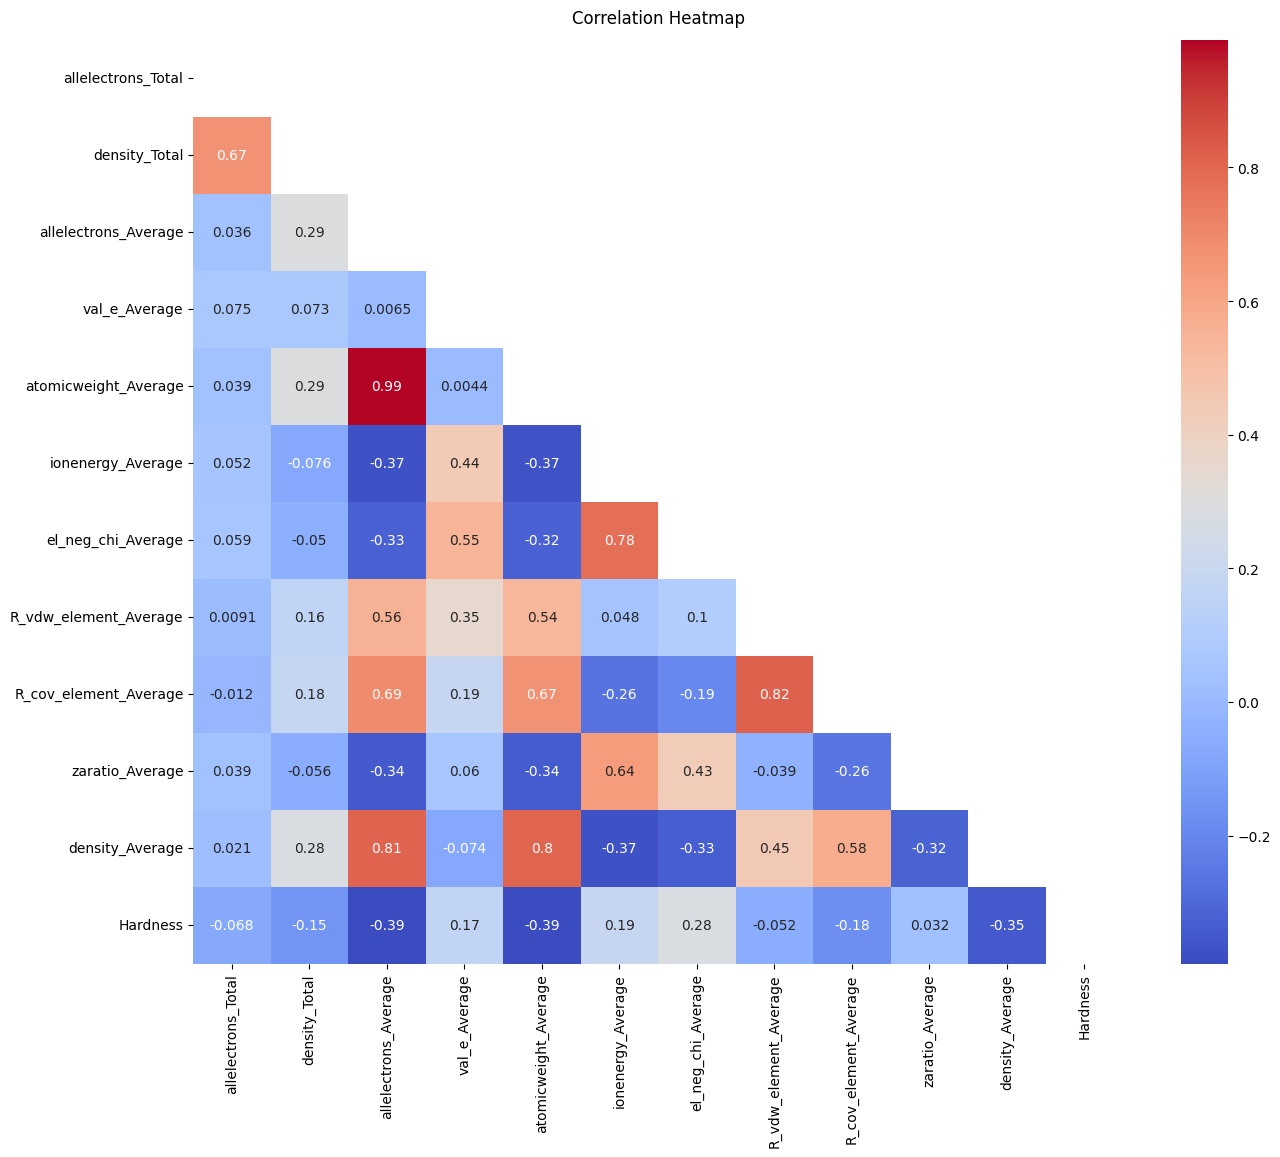

In [25]:
plt.figure(figsize=(15, 12))
mask = np.triu(np.ones_like(train.corr()))
heatmap = sns.heatmap(train.corr(), mask=mask, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

In [26]:
train["Hardness_Range"] = pd.cut(train["Hardness"],
                                 bins=[-np.inf, 2, 4, 6, 8, np.inf],
                                 labels=["0-2","2-4","4-6","6-8","8-10"])

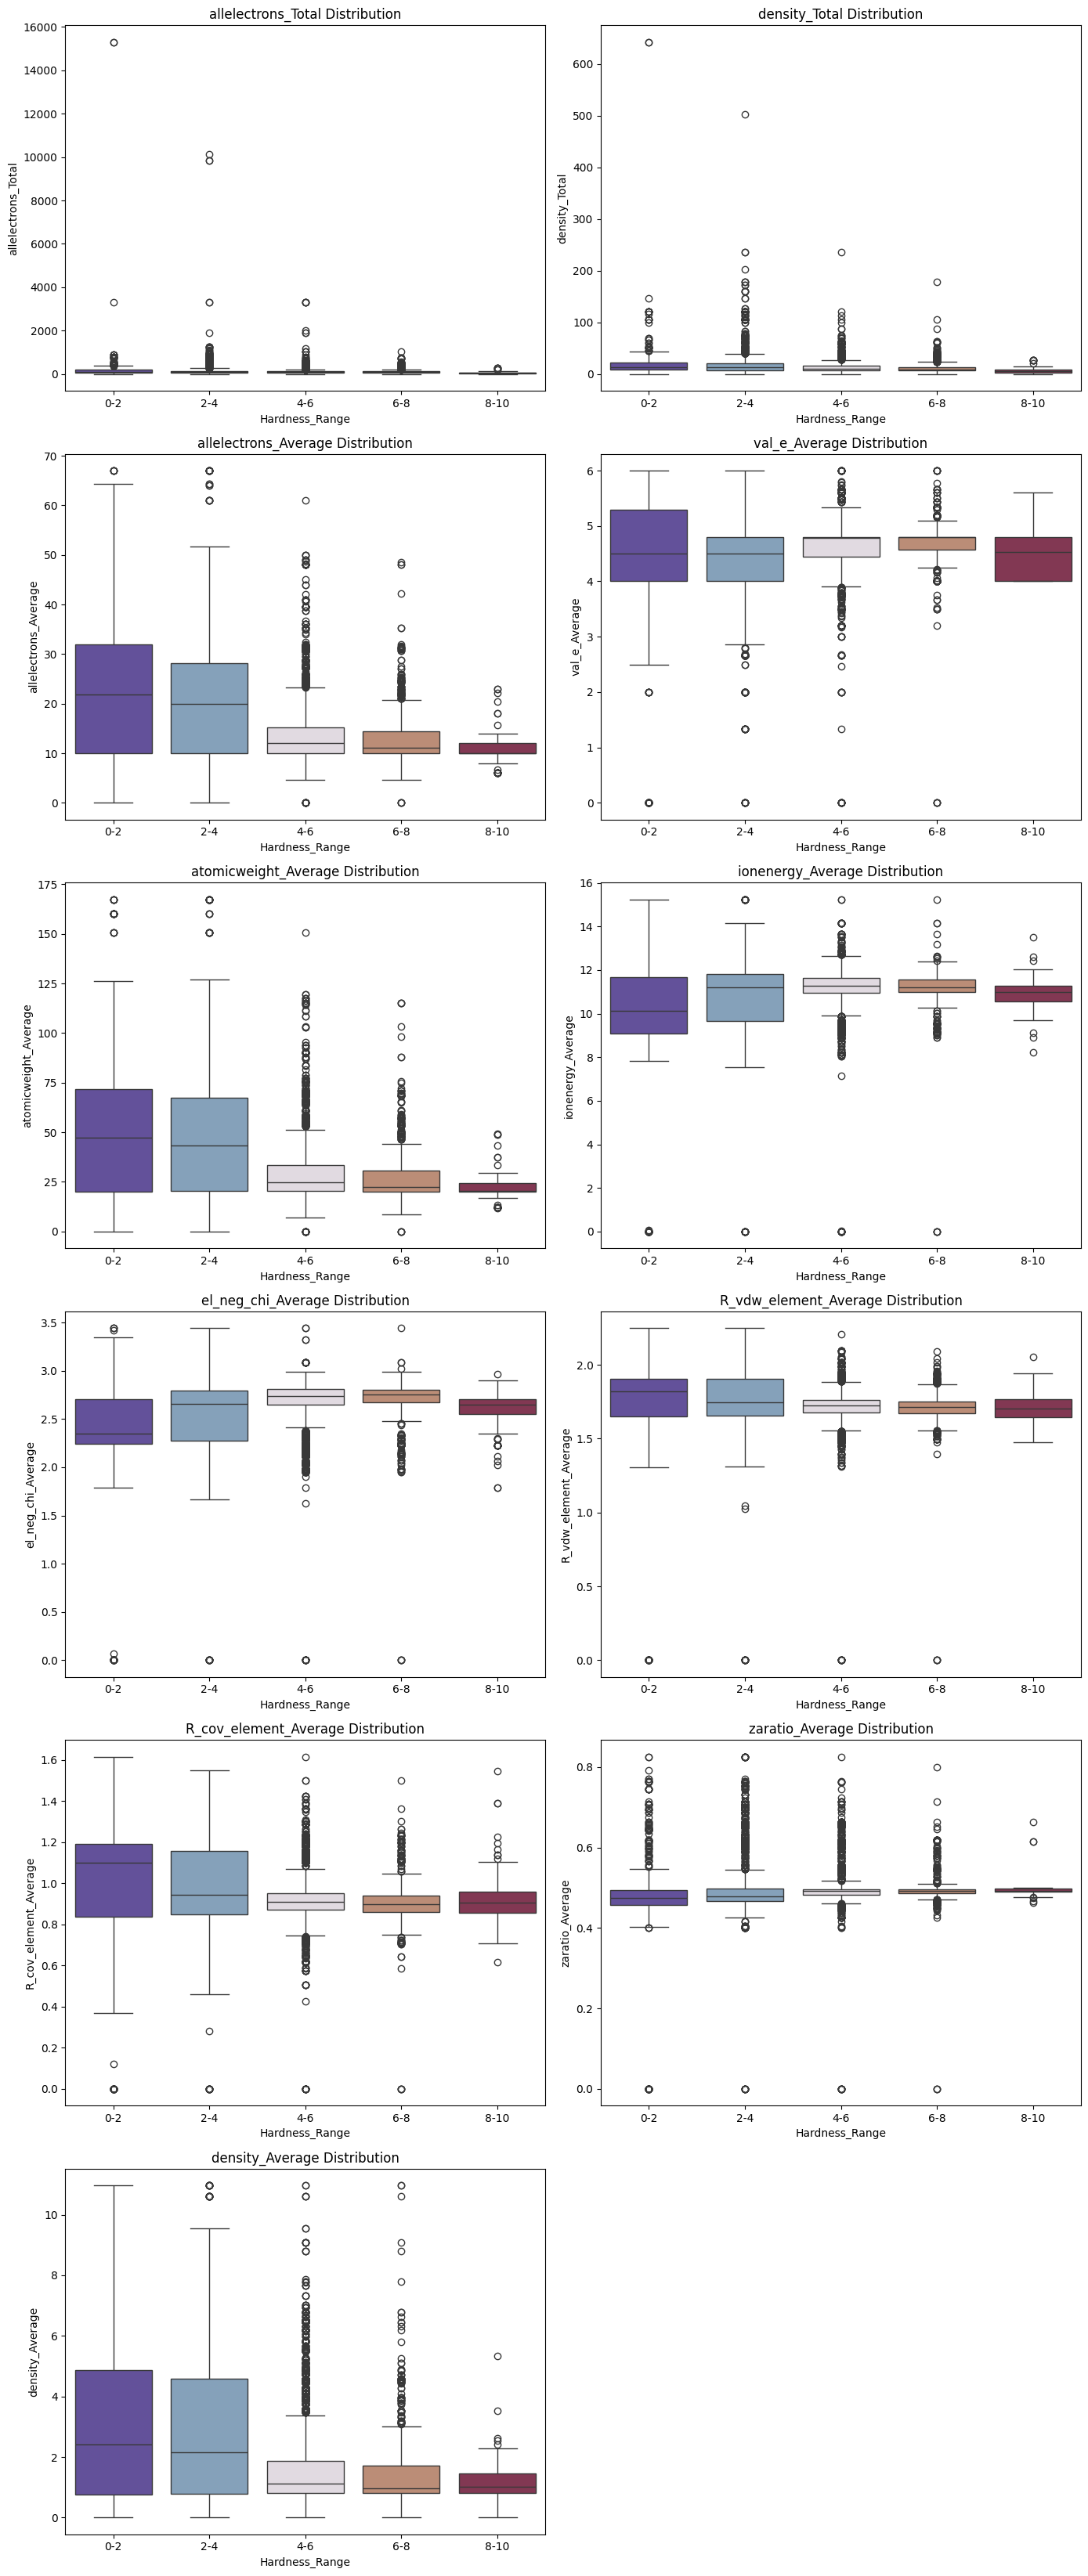

In [27]:
plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.boxplot(x="Hardness_Range", y=column, data=train,palette="twilight_shifted")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

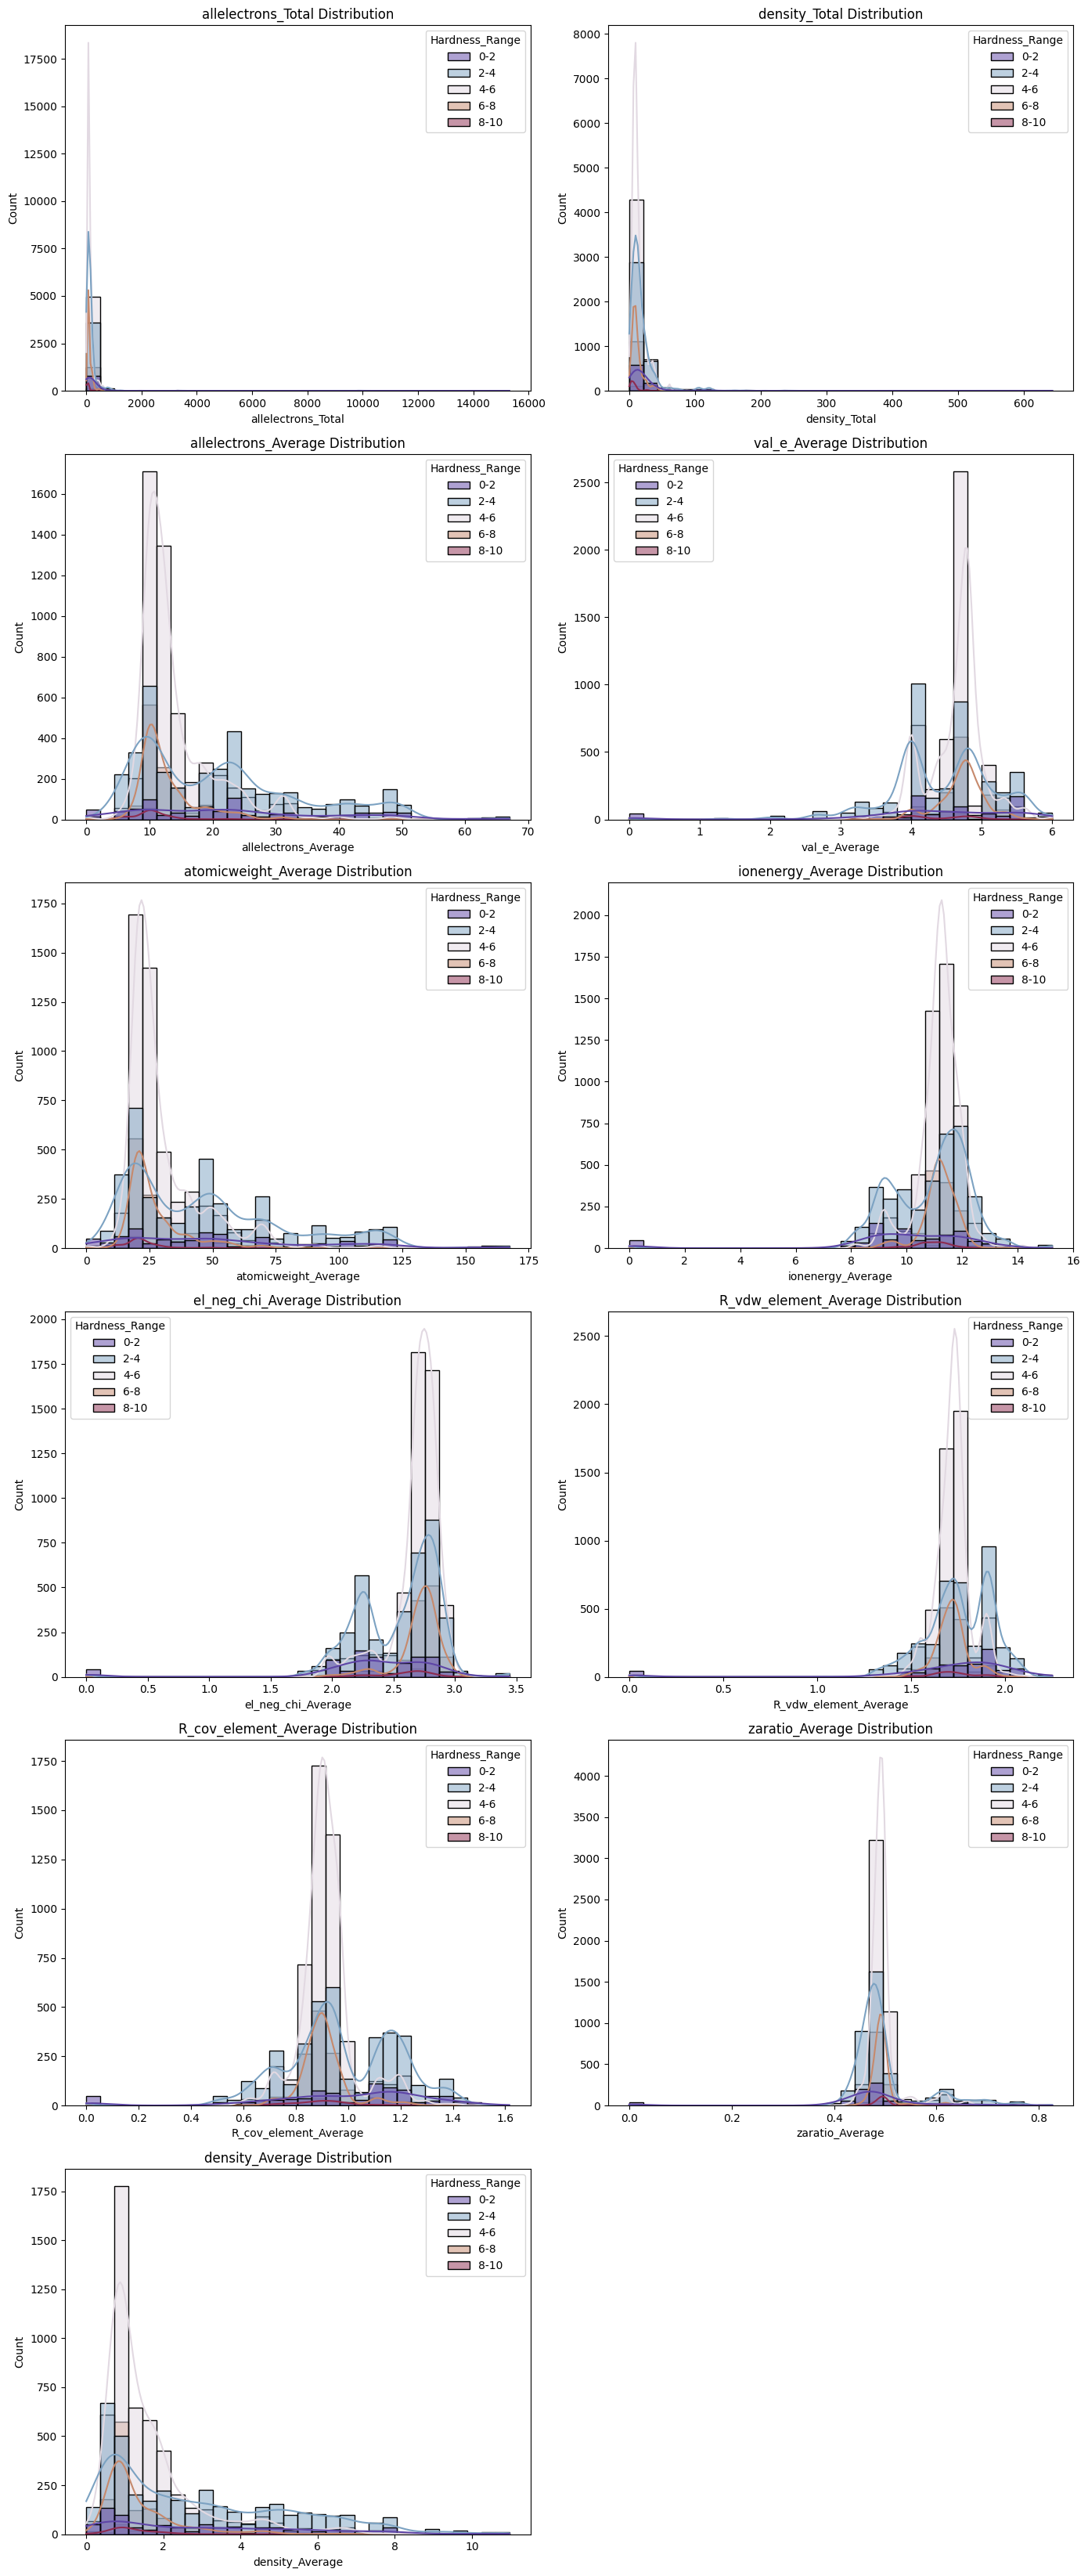

In [28]:
plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.histplot(x=column, hue="Hardness_Range", data=train,bins=30,kde=True, palette="twilight_shifted")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

In [30]:
def new_features(data):
    # Atomic weight and ionization energy ratio
    data['atomicweight_ionenergy_Ratio'] = data['atomicweight_Average'] / (data['ionenergy_Average'] + 0.0000001)
    # Electronegativity and Van der Waals radius ratio
    data['el_neg_chi_R_vdw_Ratio'] = data['el_neg_chi_Average'] / (data['R_vdw_element_Average'] + 0.0000001)
    # Covalent radius and density ratio
    data['R_cov_density_Ratio'] = data['R_cov_element_Average'] / (data['density_Average'] + 0.0000001)
    # Normalized density with respect to the total number of electrons
    data['normalized_density'] = data['density_Total'] / (data['allelectrons_Total'] + 0.0000001)
    return data

In [31]:
train = new_features(train)
train

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness,Hardness_Range,atomicweight_ionenergy_Ratio,el_neg_chi_R_vdw_Ratio,R_cov_density_Ratio,normalized_density
0,100.0,0.841611,10.000000,4.800000,20.612526,11.088100,2.766000,1.732000,0.860000,0.496070,0.914570,6.0,4-6,1.858977,1.596998,0.940333,0.008416
1,100.0,7.558488,10.000000,4.800000,20.298893,12.040830,2.755000,1.631000,0.910000,0.492719,0.717600,6.5,6-8,1.685838,1.689148,1.268116,0.075585
2,76.0,8.885992,15.600000,5.600000,33.739258,12.086300,2.828000,1.788000,0.864000,0.481478,1.506330,2.5,2-4,2.791529,1.581655,0.573579,0.116921
3,100.0,8.795296,10.000000,4.800000,20.213349,10.948500,2.648000,1.626000,0.936000,0.489272,0.789370,6.0,4-6,1.846221,1.628536,1.185756,0.087953
4,116.0,9.577996,11.600000,4.800000,24.988133,11.824480,2.766000,1.682000,0.896000,0.492736,1.864810,6.0,4-6,2.113254,1.644471,0.480478,0.082569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10996,156.0,21.575328,26.000000,4.833333,61.191020,11.496917,2.953333,1.711667,0.911667,0.472267,3.595888,2.9,2-4,5.322385,1.725414,0.253530,0.138303
10997,86.0,6.674328,14.333333,5.166667,30.645954,11.862733,2.861667,1.700000,0.901667,0.487172,1.112388,4.5,4-6,2.583380,1.683333,0.810568,0.077608
10998,38.0,7.134332,19.000000,4.000000,40.689515,11.506150,2.545000,1.765000,0.920000,0.479405,3.567166,4.0,2-4,3.536327,1.441926,0.257908,0.187746
10999,86.0,8.841328,14.333333,5.000000,30.550687,11.543000,2.831667,1.735000,0.890000,0.489507,1.473555,7.5,6-8,2.646685,1.632084,0.603982,0.102806


In [32]:
test = new_features(test)
test

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,atomicweight_ionenergy_Ratio,el_neg_chi_R_vdw_Ratio,R_cov_density_Ratio,normalized_density
0,884.0,121.420000,35.360000,5.280000,82.561240,9.370384,2.298000,1.907200,1.200000,0.461899,1.79459,8.810870,1.204908,0.668676,0.137353
1,90.0,9.931960,18.000000,5.600000,39.568056,12.086300,2.868000,1.652000,0.864000,0.476196,1.41194,3.273794,1.736077,0.611924,0.110355
2,116.0,7.767992,11.600000,4.800000,23.231818,11.023840,2.644000,1.794000,0.960000,0.499514,0.78834,2.107416,1.473801,1.217749,0.066965
3,100.0,9.107996,10.000000,4.800000,20.298893,12.086300,2.828000,1.662000,0.792000,0.495796,1.20466,1.679496,1.701564,0.657447,0.091080
4,55.0,4.030000,11.000000,4.000000,22.977675,11.280950,2.455000,1.750000,0.893333,0.476095,0.93456,2.036856,1.402857,0.955886,0.073273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6934,446.0,36.135392,9.636364,4.636364,19.689448,11.045515,2.768636,1.769697,0.871818,0.498702,0.11548,1.782574,1.564469,7.549510,0.081021
6935,36.0,3.550000,18.000000,4.000000,36.068500,8.236600,1.790000,2.055000,1.390000,0.499000,1.35045,4.379052,0.871046,1.029286,0.098611
6936,68.0,4.545328,11.333333,5.333333,22.688853,10.938358,2.876667,1.713333,0.916667,0.499074,0.73425,2.074247,1.678988,1.248439,0.066843
6937,40.0,2.334164,6.666667,4.000000,13.016128,12.700467,2.770000,1.476667,0.616667,0.663797,0.51227,1.024854,1.875846,1.203792,0.058354


In [33]:
# Drop the features which are highly correlated with each other (linear correlation)
def high_corr_drop(df, cols):
    df = df.copy()
    correlation = df[cols].corr().abs()
    mask = np.triu(np.ones_like(correlation).astype(bool), k=1)
    drop_list = correlation[(correlation.where(mask) > 0.91).sum() > 0].index.tolist()
    df = df.drop(drop_list, axis=1)
    return df

In [34]:
train = high_corr_drop(train,num_cols)
test = high_corr_drop(test,num_cols)
num_cols = [col for col in train.columns if (train[col].dtype in ["int64","float64"]) & (train[col].nunique()>50)]

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

In [36]:
X = train.drop(["Hardness","Hardness_Range"], axis=1)
y = train["Hardness"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state = 4118)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3330
[LightGBM] [Info] Number of data points in the train set: 9900, number of used features: 14
[LightGBM] [Info] Start training from score 5.500000


0.45323930674121193

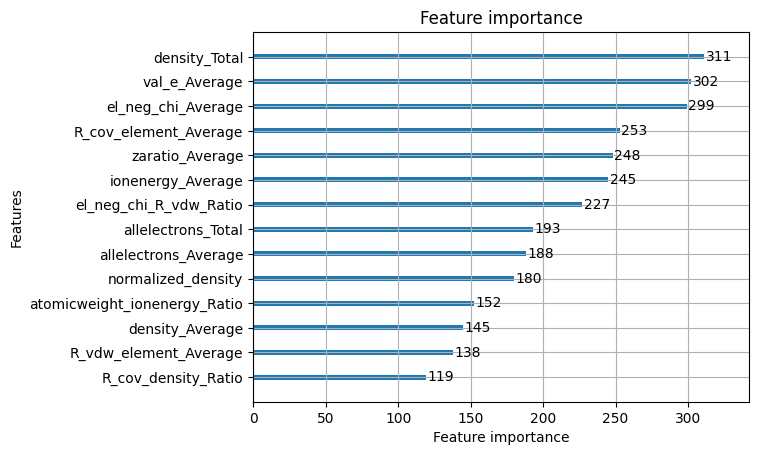

In [37]:
import lightgbm
lgb = lightgbm.LGBMRegressor(objective = 'mae')
lgb.fit(X_train, y_train)
lightgbm.plot_importance(lgb)
median_absolute_error(y_test,lgb.predict(X_test))

0.4806468963623045

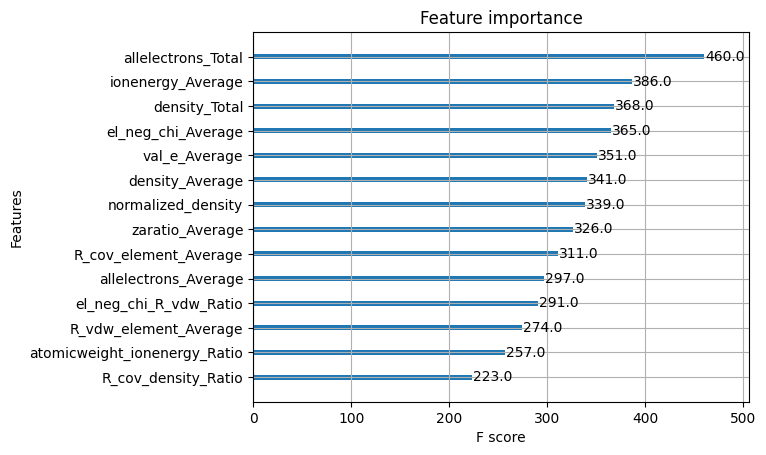

In [38]:
import xgboost
xgb = xgboost.XGBRegressor(objective = 'reg:absoluteerror')
xgb.fit(X_train, y_train)
xgboost.plot_importance(xgb)
median_absolute_error(y_test,xgb.predict(X_test))

In [39]:
# Parameter fine-tuning with optuna
from lightgbm import LGBMRegressor
import optuna

def objective_lgb(trial):
    """Define the objective function"""

    params = {
        'metric': trial.suggest_categorical('metric', ['mean_absolute_error']),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),
        'n_estimators': trial.suggest_int('n_estimators', 300, 700),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.1, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        "seed" : trial.suggest_categorical('seed', [42]),
        'objective': trial.suggest_categorical('objective', ['mae']),
    }


    model_lgb = LGBMRegressor(**params)
    model_lgb.fit(X_train, y_train)
    y_pred = model_lgb.predict(X_test)
    return median_absolute_error(y_test,y_pred)

In [40]:
study_lgb = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_lgb.optimize(objective_lgb, n_trials=50,show_progress_bar=True)

[I 2023-11-19 02:02:05,199] A new study created in memory with name: no-name-04c9a1ec-b3fb-4496-8f19-aecdc064ec3b


  0%|          | 0/50 [00:00<?, ?it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001015 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3330
[LightGBM] [Info] Number of data points in the train set: 9900, number of used features: 14
[LightGBM] [Info] Start training from score 5.500000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad sin

In [41]:
study_lgb.best_params

{'metric': 'mean_absolute_error',
 'max_depth': 7,
 'min_child_samples': 2,
 'learning_rate': 0.025303344497482873,
 'n_estimators': 659,
 'min_child_weight': 3,
 'subsample': 0.49975866202699243,
 'colsample_bytree': 0.7306132412309653,
 'reg_alpha': 0.3440474275992237,
 'reg_lambda': 0.8497718271654244,
 'seed': 42,
 'objective': 'mae'}

In [42]:
# Use the best parameters to train the model (LightGBM)
lgb = LGBMRegressor(**study_lgb.best_params)
lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_test)
median_absolute_error(y_test, y_pred)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000979 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3330
[LightGBM] [Info] Number of data points in the train set: 9900, number of used features: 14
[LightGBM] [Info] Start training from score 5.500000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.4334574387771948

In [43]:
# XGBoost
from xgboost import XGBRegressor

def objective_xg(trial):
    """Define the objective function"""

    params = {
        'booster': trial.suggest_categorical('booster', ['gbtree']),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),
        'n_estimators': trial.suggest_int('n_estimators', 300, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.3, 0.9),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        "seed" : trial.suggest_categorical('seed', [42]),
        'eval_metric': trial.suggest_categorical('eval_metric', ['mae']),
        'objective': trial.suggest_categorical('objective', ['reg:absoluteerror']),
    }
    model_xgb = XGBRegressor(**params)
    model_xgb.fit(X_train, y_train)
    y_pred = model_xgb.predict(X_test)
    return median_absolute_error(y_test,y_pred)

In [44]:
study_xgb = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_xgb.optimize(objective_xg, n_trials=50,show_progress_bar=True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [45]:
study_xgb.best_params

{'booster': 'gbtree',
 'max_depth': 6,
 'learning_rate': 0.01768847774625241,
 'n_estimators': 949,
 'min_child_weight': 6,
 'gamma': 0.003265246627525558,
 'subsample': 0.7987671139717493,
 'reg_alpha': 0.8732777220162063,
 'reg_lambda': 0.6692581935158559,
 'seed': 42,
 'eval_metric': 'mae',
 'objective': 'reg:absoluteerror'}

In [46]:
xgb = XGBRegressor(**study_xgb.best_params)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
median_absolute_error(y_test, y_pred)

0.4207315444946289

In [47]:
from sklearn.ensemble import VotingRegressor
voting = VotingRegressor(estimators=[
    ('lgbm', lgb),
    ('xgb', xgb)])
voting.fit(X_train,y_train)
voting_pred = voting.predict(X_test)
median_absolute_error(y_test, voting_pred)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001002 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3330
[LightGBM] [Info] Number of data points in the train set: 9900, number of used features: 14
[LightGBM] [Info] Start training from score 5.500000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.42301701713550877

In [48]:
sub = submission_df.copy()

In [49]:
sub['Hardness']=voting.predict(test)
sub.to_csv(r'Dataset/MohsHardnessDataset/Prediction/20231119_BaselinePredictionV2.csv', index=False)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
